In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_json("gme.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


#### Date - The date that the stock’s behavior was observed.
#### Open - The price the stock sold for as soon as the markets opened.
#### High - The highest price the stock sold for on a particular day.
#### Low - The lowest price the stock sold for on a particular day.
#### Close - The price the stock sold for as soon as the markets closed.
#### Adj Close - The close price after all corporate actions of the day are accounted for (i.e. dividends, splitting, etc.).
#### Volume - The number of stocks traded (bought and sold) in a day.

<AxesSubplot:xlabel='Low', ylabel='Volume'>

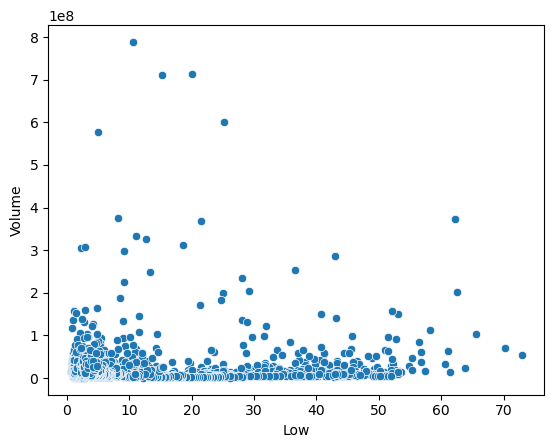

In [3]:
sns.scatterplot(data=df, x='Low', y='Volume')

<AxesSubplot:>

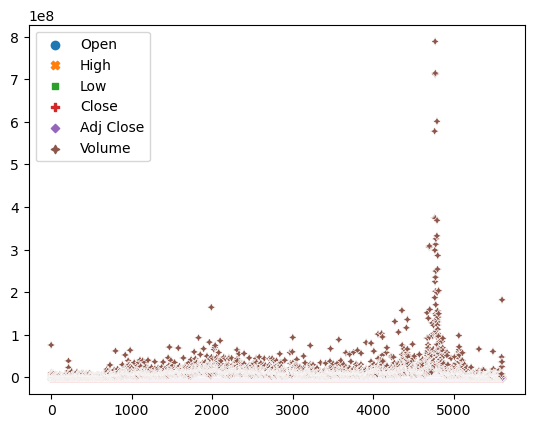

In [4]:
sns.scatterplot(data=df)

In [5]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [6]:
df.loc[0]['Date'].month

2

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


In [8]:
count = 0
total = 0
for month in range(1, 13):
    for i in range(len(df)):
        if df.loc[i]['Date'].month == month:
            avg = (df.loc[i]['High'] + df.loc[i]['Low']) / 2
            total += avg
            count += 1
total/count

9.233137054107122

<AxesSubplot:xlabel='Low', ylabel='Volume'>

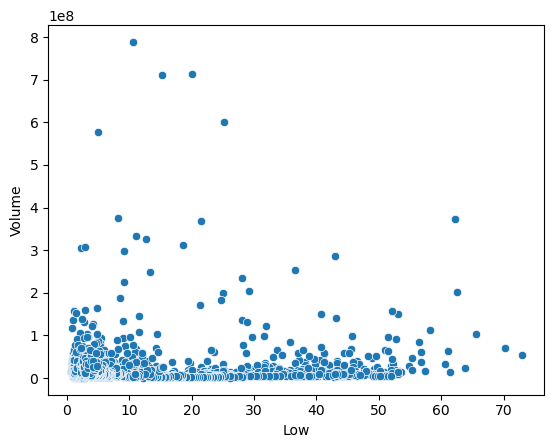

In [9]:
sns.scatterplot(data=df, x='Low', y='Volume')

In [10]:
df['Volume'].corr(df['Low'])

0.10259646883179024

# The Relationship between Low and Volume

#### The Relationship between Low and Volume has a very very weak relationship, with the correlation number being 0.10259, meaning it is positive and the strength of this graph it is very very weak. Overall, the graph has no correlation with the Low and Volume of stocks being traded.

<AxesSubplot:xlabel='Date', ylabel='High'>

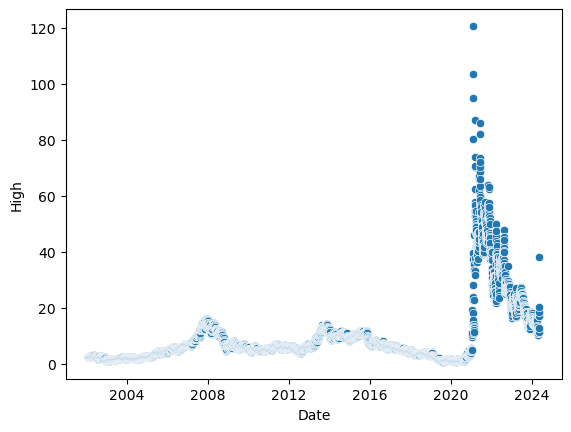

In [11]:
sns.scatterplot(data=df, x='Date', y='High')

In [12]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [13]:
df[df['Date'] == df['Date'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
5599,2024-05-13,26.34,38.200001,24.77,30.450001,30.450001,182308700


<AxesSubplot:xlabel='Date', ylabel='High'>

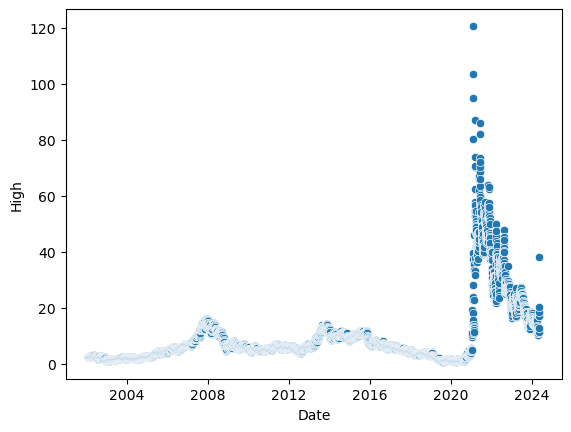

In [14]:
sns.scatterplot(data=df, x='Date', y='High')

In [15]:
log_high = np.log(df["High"])

In [16]:
df["Log High"] = log_high

In [17]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9  # Converts to seconds since epoch

# Now you can calculate the Pearson correlation between 'numeric_time' and another variable
correlation = df['numeric_time'].corr(df['Log High'])
correlation

0.45097470030936637

<AxesSubplot:xlabel='Date', ylabel='Volume'>

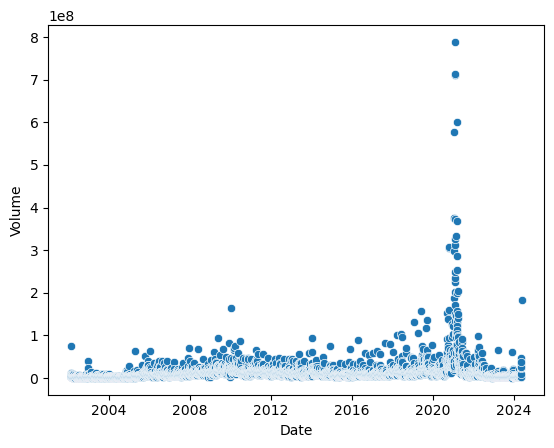

In [18]:
sns.scatterplot(data=df, x='Date', y='Volume')

In [19]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Log High,numeric_time
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,16.309999,24308600,2.850128,1715040000
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,15.920000,24775100,2.847232,1715126400
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,18.010000,25759300,2.918311,1715212800
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,17.459999,36831900,3.005683,1715299200
5599,2024-05-13,26.340000,38.200001,24.770000,30.450001,30.450001,182308700,3.642836,1715558400


In [20]:
df['Date'].max()

Timestamp('2024-05-13 00:00:00')

In [21]:
df['Volume'].mean()

14139570.160714285

In [22]:
years = {}
for i in range(len(df)):
    year = df.loc[i]["Date"].year
    if year not in years.keys() and year != 2024:
        years[year] = 1
    elif year in years.keys() and year != 2024:
        years[year] += 1
sum(years.values())/len(years)

250.36363636363637

In [23]:
df.drop('Adj Close', axis=1, inplace=True)

In [24]:
url = 'https://api.polygon.io/v1/open-close/GME/2024-05-14?adjusted=false&apiKey=agPbe3e7S2j71nS16OUlvT2GZaR9Q5MH'
r = requests.get(url)
data = r.json()

print(data)

{'status': 'OK', 'from': '2024-05-14', 'symbol': 'GME', 'open': 64.83, 'high': 64.83, 'low': 36, 'close': 48.75, 'volume': 206973629.0, 'afterHours': 51, 'preMarket': 40.31}


In [25]:
def gather_data(start, end):
    '''
    Request a json payload from Polygon.io for each day within the timeframe, described by
    {start} and {end}.
    Once I get json for a day, I need to add it to a dictionary before returning the dataframe.
    '''
    # Create dictionary for final dataframe
    data = {"Date": [],"Open": [],"High": [],"Low": [],"Close": [],"Volume": []}
    
    # Get the month as a number to iterate through timespan
    startMonth = pd.to_datetime(start).month
    endMonth = pd.to_datetime(end).month
    
    # Iterate through timespan
    for month in range(startMonth, endMonth + 1):
        # Get most of days in month
        for day in range(1, 26):
            # Create string of date for URL
            if day < 10:
                current = '2024-0' + str(month) + '-0' + str(day)
            else:
                current = '2024-0' + str(month) + '-0' + str(day) 
            
            # Make request
            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=false&apiKey=pqM3pnssdX3a9Ps3whjdxguDpbElVPfg'
            r = requests.get(url)
            jsonData = r.json()
            
            # Add date-specific data to dictionary
            data["Open"].append(jsonData['open'])
            data["High"].append(jsonData['high'])
            data["Low"].append(jsonData["low"])
            data["Close"].append(jsonData['close'])
            data["Volume"].append(jsonData['volume'])
            date = pd.to_datetime(current)
            data["Date"].append(date)
    
        # Remove break statements if you want to make multiple requests
            break
        break
    
    # return dataframe of data
    return pd.DataFrame(data)

In [26]:
gather_data('2024-05-14', '2024-09-26')

,Date,Open,High,Low,Close,Volume
0,2024-05-01,11.03,11.32,10.7,10.91,2631514.0


In [27]:
# Reading in more recent GME data
df2 = pd.read_json("recentGME.json")
# Adding new data to the bottom of the OG GME dataframe
result = pd.concat([df, df2])
result.reset_index(inplace=True)

In [28]:
df3 = pd.read_csv("AMC.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5600 non-null   datetime64[ns]
 1   Open          5600 non-null   float64       
 2   High          5600 non-null   float64       
 3   Low           5600 non-null   float64       
 4   Close         5600 non-null   float64       
 5   Volume        5600 non-null   int64         
 6   Log High      5600 non-null   float64       
 7   numeric_time  5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 350.1 KB


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    94 non-null     datetime64[ns]
 1   Open    94 non-null     float64       
 2   High    94 non-null     float64       
 3   Low     94 non-null     float64       
 4   Close   94 non-null     float64       
 5   Volume  94 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.5 KB


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2081 non-null   object 
 1   Open       2081 non-null   float64
 2   High       2081 non-null   float64
 3   Low        2081 non-null   float64
 4   Close      2081 non-null   float64
 5   Adj Close  2081 non-null   float64
 6   Volume     2081 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.9+ KB


In [32]:
df3.drop('Adj Close', axis=1, inplace=True)

In [33]:
df3['Date'] = pd.to_datetime(df3['Date'])

<AxesSubplot:xlabel='Date', ylabel='High'>

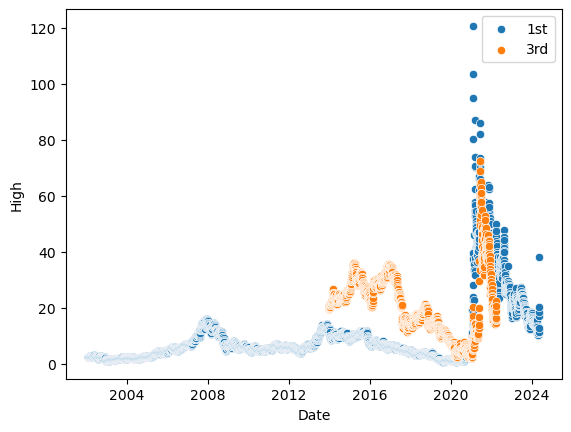

In [34]:
sns.scatterplot(data=df, x='Date', y='High', label='1st')
sns.scatterplot(data=df3, x='Date', y='High', label='3rd')

# How to make this graph more readable?

1. Trim the GME dataset so that it only includes data that match the AMC data.
2. Add a Title to the graph to know what we are looking at.
3. 

In [35]:
LightEncode = pd.read_json("light_encode_wsb.json")
Raw = pd.read_json("raw_wsb.json")

In [36]:
LightEncode.head()

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [37]:
Raw.head()

,timestamp,score,comms_num
0,2020-09-29,4,11
1,2021-01-28,1149849,170206
2,2021-01-29,6410329,821915
3,2021-01-30,6576878,734451
4,2021-01-31,4911452,288004


In [38]:
LightEncode.rename(columns={'timestamp' : 'Date'}, inplace=True)

In [39]:
df3_LightEncode = LightEncode[LightEncode['label'] == "AMC"]
df3_LightEncode

,label,Date,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710
...,...,...,...,...
151,AMC,2021-08-09,3016,270
152,AMC,2021-08-10,1337,4328
153,AMC,2021-08-11,532,3268
154,AMC,2021-08-15,789,214


In [40]:
merged_df3 = pd.merge(LightEncode, df3, how='inner', on='Date')
merged_df3

,label,Date,score,comms_num,Open,High,Low,Close,Volume
0,AMC,2021-01-28,38408,6027,11.980000,16.500000,6.510000,8.630000,591223900
1,Both,2021-01-28,733,208,11.980000,16.500000,6.510000,8.630000,591223900
2,GME,2021-01-28,268078,26332,11.980000,16.500000,6.510000,8.630000,591223900
3,Other,2021-01-28,842630,137639,11.980000,16.500000,6.510000,8.630000,591223900
4,AMC,2021-01-29,22404,7023,14.310000,16.000000,11.600000,13.260000,602193300
...,...,...,...,...,...,...,...,...,...
346,Other,2021-08-12,47788,35914,30.910000,34.099998,30.750000,33.070000,71050000
347,GME,2021-08-13,84,49,32.200001,34.480000,31.879999,33.470001,57990800
348,Other,2021-08-13,49426,44466,32.200001,34.480000,31.879999,33.470001,57990800
349,Other,2020-09-29,4,11,4.880000,4.940000,4.750000,4.860000,2520000


In [41]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   label      351 non-null    object        
 1   Date       351 non-null    datetime64[ns]
 2   score      351 non-null    int64         
 3   comms_num  351 non-null    int64         
 4   Open       351 non-null    float64       
 5   High       351 non-null    float64       
 6   Low        351 non-null    float64       
 7   Close      351 non-null    float64       
 8   Volume     351 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 27.4+ KB


In [47]:
merged_df3['comms_num']

0        6027
1         208
2       26332
3      137639
4        7023
        ...  
346     35914
347        49
348     44466
349        11
350       737
Name: comms_num, Length: 351, dtype: int64

<AxesSubplot:xlabel='High', ylabel='comms_num'>

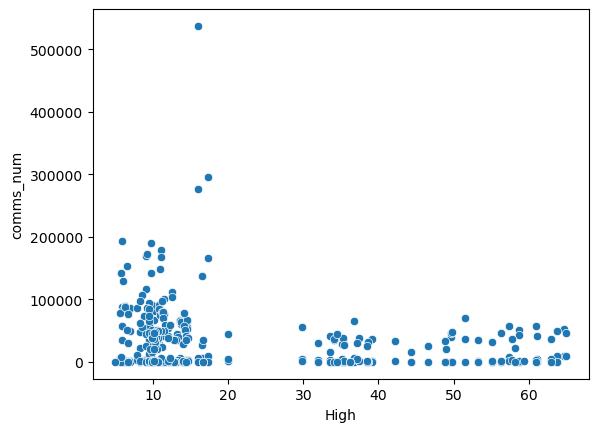

In [43]:
sns.scatterplot(data=merged_df3, x='High', y='comms_num')

In [44]:
log_comms_num = np.log(merged_df3["comms_num"])

In [50]:
log_high = np.log(merged_df3["High"])
merged_df3.head()

,label,Date,score,comms_num,Open,High,Low,Close,Volume
0,AMC,2021-01-28,38408,6027,11.98,16.5,6.51,8.63,591223900
1,Both,2021-01-28,733,208,11.98,16.5,6.51,8.63,591223900
2,GME,2021-01-28,268078,26332,11.98,16.5,6.51,8.63,591223900
3,Other,2021-01-28,842630,137639,11.98,16.5,6.51,8.63,591223900
4,AMC,2021-01-29,22404,7023,14.31,16.0,11.60,13.26,602193300


<AxesSubplot:xlabel='High', ylabel='comms_num'>

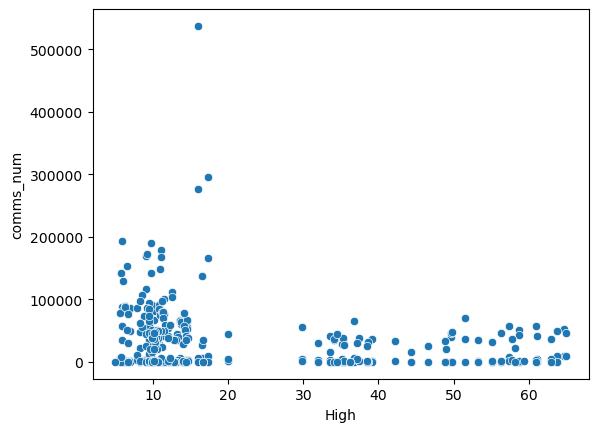

In [51]:
sns.scatterplot(data=merged_df3, x='High', y='comms_num')

<AxesSubplot:xlabel='High', ylabel='comms_num'>

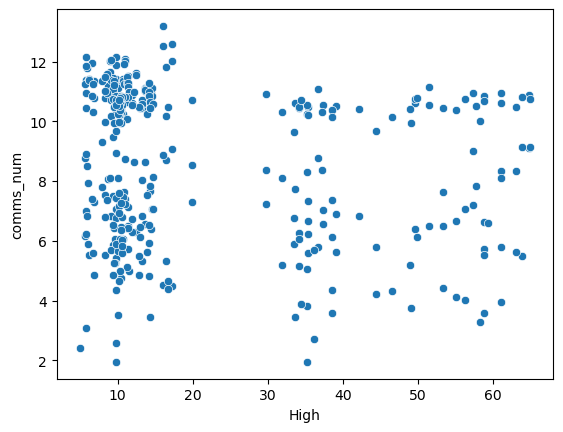

In [54]:
sns.scatterplot(data=merged_df3, x='High', y=log_comms_num)

In [55]:
merged_df3['numeric_time'] = pd.to_datetime(merged_df3['Date']).astype('int64') // 10**9  # Converts to seconds since epoch

# Now you can calculate the Pearson correlation between 'numeric_time' and another variable
correlation = merged_df3['numeric_time'].corr(df['Log High'])
correlation

-0.7349647781059314